In [1]:
import pandas as pd
data = pd.read_csv("stroke-data.csv.zst")

In [2]:
display(data.shape)
display(data.head())
display(data.info())

(5110, 12)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


None

In [3]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [4]:
display(data["gender"].unique())
display(data["hypertension"].unique())
display(data["heart_disease"].unique())
display(data["ever_married"].unique())
display(data["work_type"].unique())
display(data["Residence_type"].unique())
display(data["smoking_status"].unique())
display(data["stroke"].unique())

array(['Male', 'Female', 'Other'], dtype=object)

array([0, 1])

array([1, 0])

array(['Yes', 'No'], dtype=object)

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

array(['Urban', 'Rural'], dtype=object)

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

array([1, 0])

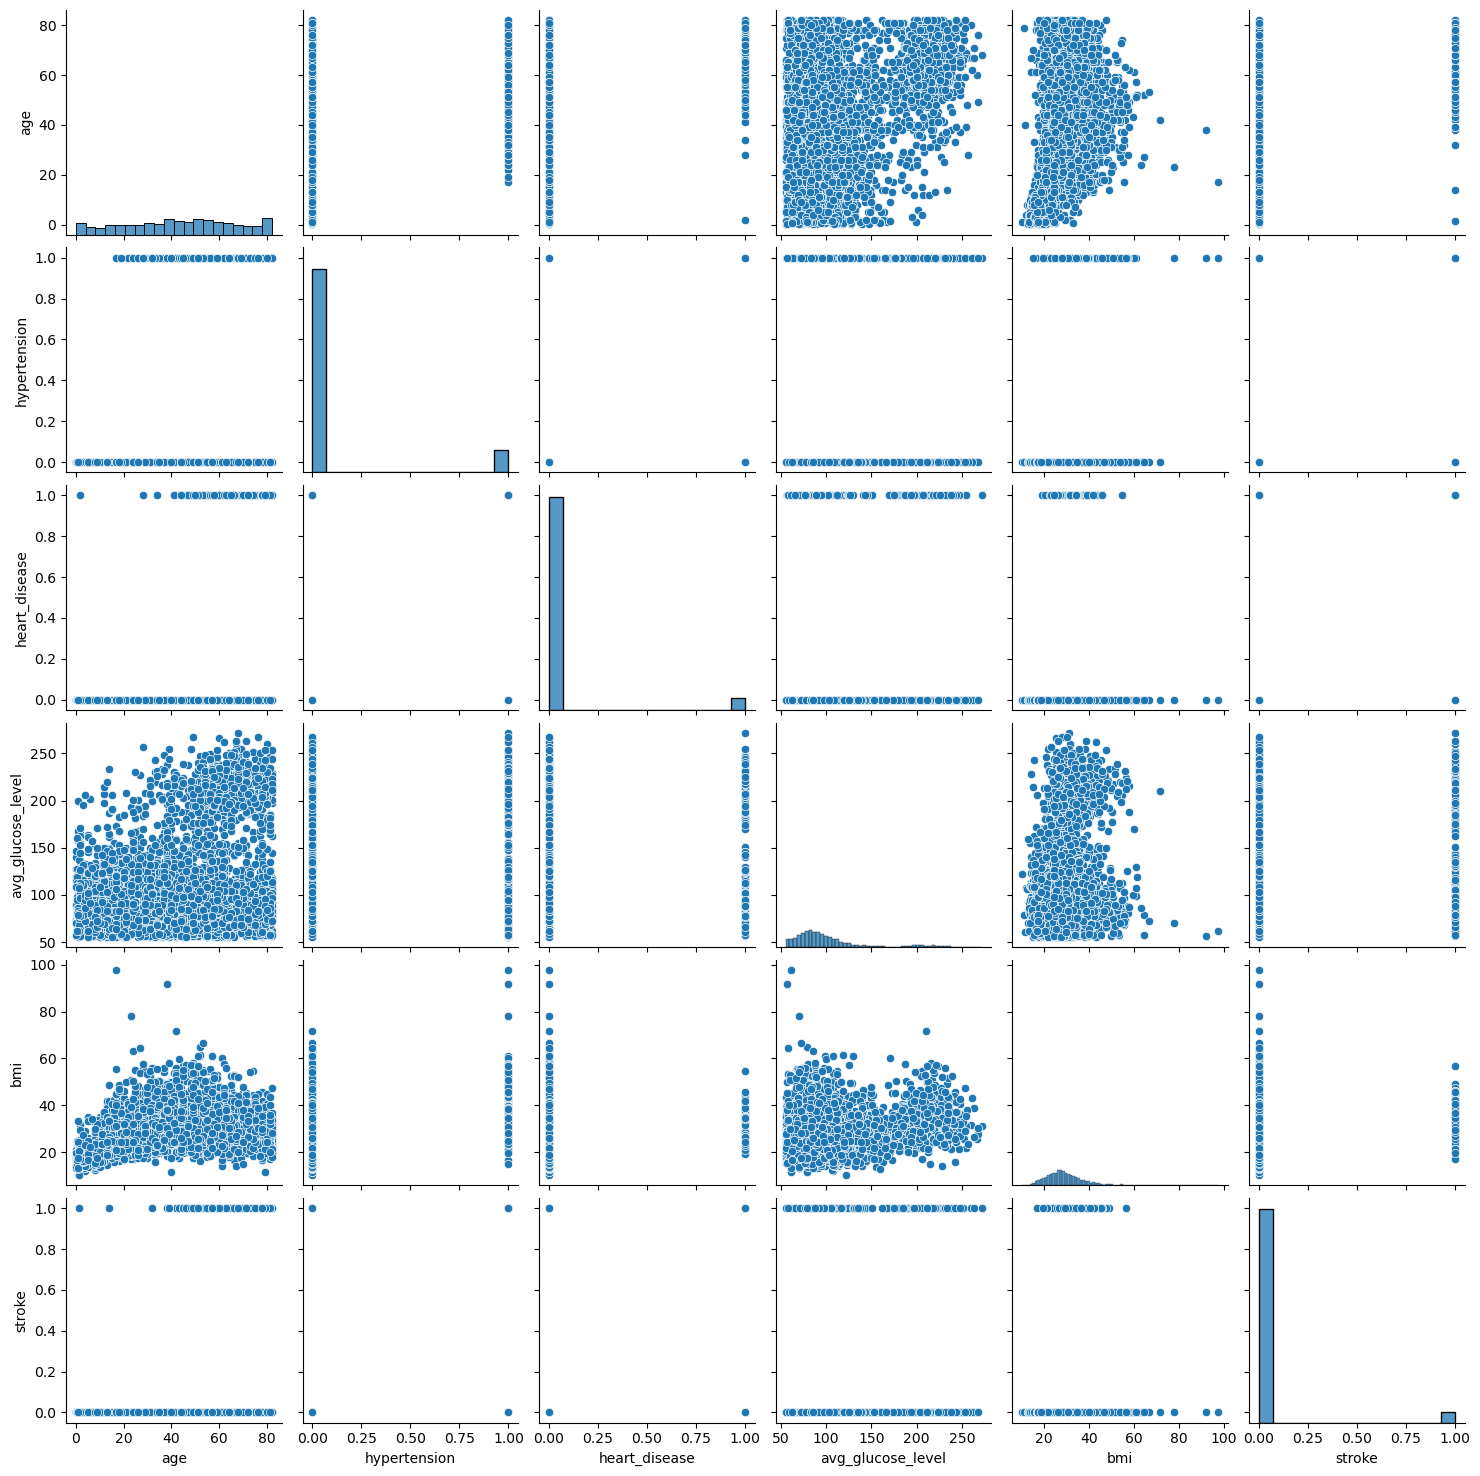

In [5]:
import seaborn as sns
sns.pairplot(data = data.drop(columns = ["id"]));

In [6]:
stroke = data.drop(data[data.stroke != 1].index)
display(stroke.head())

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


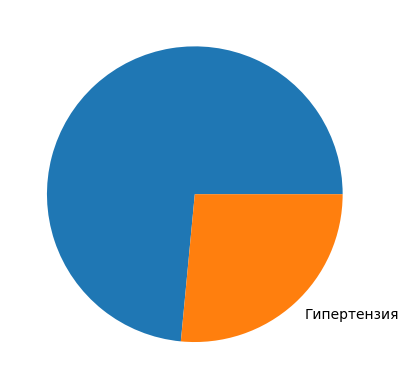

In [7]:

import matplotlib.pyplot as plt

plt.pie([stroke[stroke["hypertension"] == 0]["hypertension"].count(), stroke[stroke["hypertension"] == 1]["hypertension"].count()], labels = ["", "Гипертензия"])
plt.show()

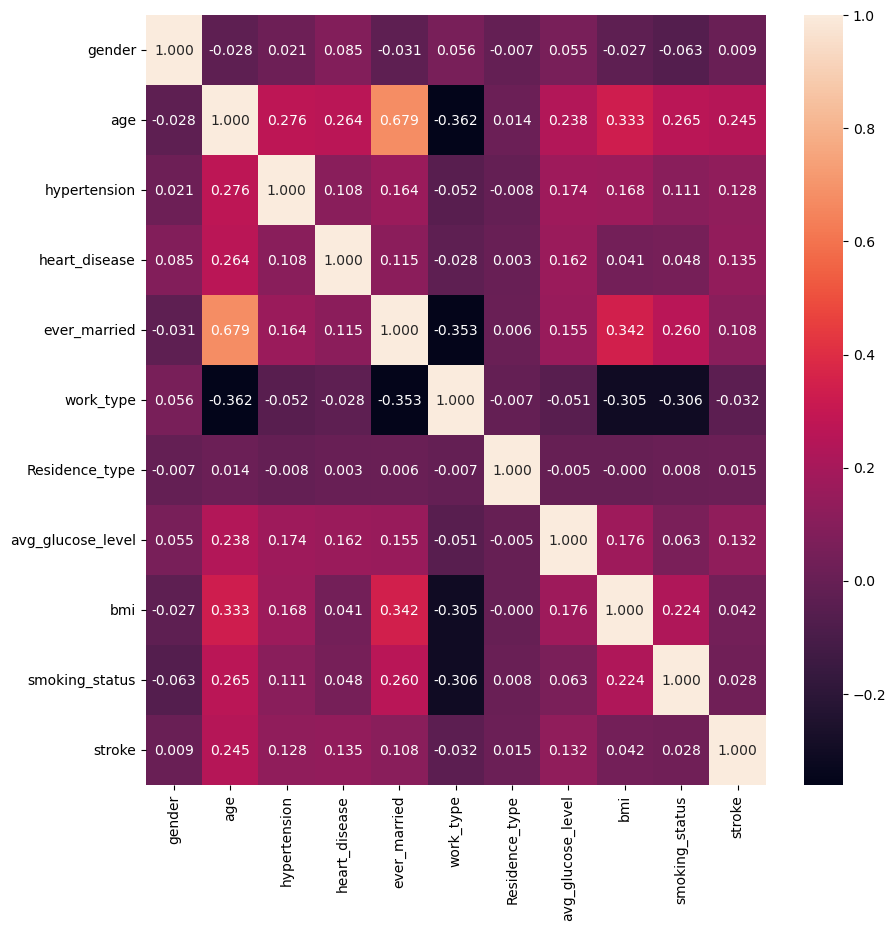

In [8]:
from sklearn.preprocessing import LabelEncoder

encoded = data
for col in ["gender", "ever_married", "work_type", "Residence_type", "smoking_status"]:
  encoded[col] = LabelEncoder().fit_transform(data[col])

plt.figure(figsize = (10, 10))
sns.heatmap(encoded.drop(columns = ["id"]).corr(numeric_only = True), annot = True, fmt = ".3f");

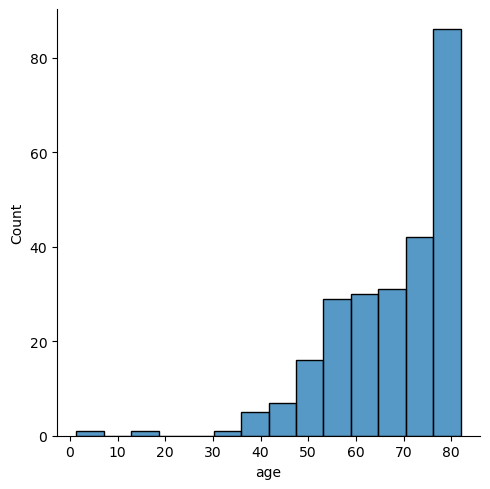

In [9]:
sns.displot(stroke, x = "age");

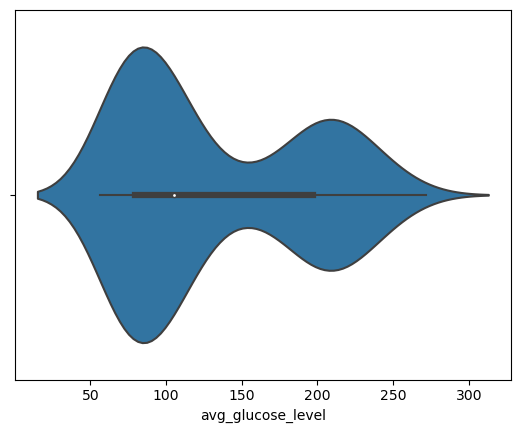

In [10]:
sns.violinplot(stroke, x = "avg_glucose_level");